 # Implementing Decision Tree classifier.

In [1]:
# Import the neccsary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('brain_stroke.csv')

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df = data.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['gender','smoking_status']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,2,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,3,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,2,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,1


In [9]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [10]:
del df['ever_married']
del df['work_type']
del df['Residence_type']

In [11]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,1,80.0,0,1,105.92,32.5,2,1
2,0,49.0,0,0,171.23,34.4,3,1
3,0,79.0,1,0,174.12,24.0,2,1
4,1,81.0,0,0,186.21,29.0,1,1


In [12]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='stroke', axis=1)
#Response variable
Y = df.loc[:,'stroke']

In [13]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(X,Y)
print("OUR DATASET COUNT         : ", Counter(Y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({0: 4733, 1: 248})
OVER SAMPLING DATA COUNT  :  Counter({1: 4733, 0: 4733})


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  6626
Number of test dataset     :  2840
Total number of dataset    :  9466


Implementing the DecisionTree classifier

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
 # Importing plot_confusion_matrix from the metrics submodule
from sklearn.tree import DecisionTreeClassifier

In [16]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)
predictDt =Dt.predict(x_test)

Finding the accuracy of Decision Tree classifier.

In [17]:
accuracy = accuracy_score(y_test, predictDt)
print("Accuracy of DecisionTree classifier:", accuracy *100)

Accuracy of DecisionTree classifier: 96.58450704225352


Finding the classification Report Decision tree classifier.

In [18]:

cr = classification_report(y_test, predictDt)
print("Classification report \n\n:", cr)

Classification report 

:               precision    recall  f1-score   support

           0       1.00      0.93      0.96      1420
           1       0.94      1.00      0.97      1420

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840



Finding the Confusion matrix Decision tree classifier.

THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:


[[1323   97]
 [   0 1420]]


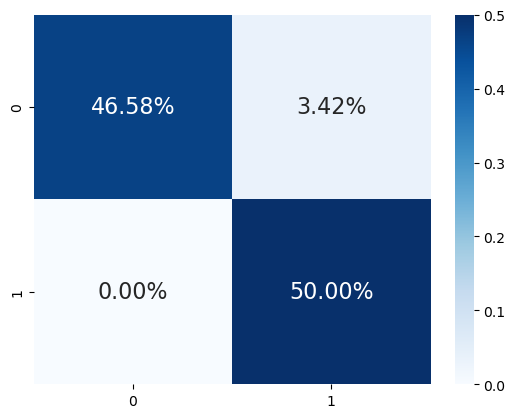

In [19]:


def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, predictDt)
print('THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [20]:
import joblib
joblib.dump(Dt,'Dtc2.pkl')

['Dtc2.pkl']